<a href="https://colab.research.google.com/github/MuhammadNurilHuda/MachineLearningProject/blob/main/Diabetic_Foot_Thermogram_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O Dataset2.zip https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset/Dataset2.zip?raw=true

In [ ]:
import zipfile, os

local_zip = '/content/Dataset2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Dataset2')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/Dataset2/Dataset', output="Dataset2_split", seed=42, ratio=(.85, .14, .01), group_prefix=None)

Copying files: 334 files [00:00, 7424.33 files/s]


In [ ]:
import os
base_dir = '/content/Dataset2_split'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_positif = os.path.join(train_dir, 'Positif')
train_negatif = os.path.join(train_dir, 'Negatif')

In [ ]:
val_positif = os.path.join(val_dir, 'Positif')
val_negatif = os.path.join(val_dir, 'Negatif')

In [ ]:
test_positif = os.path.join(test_dir, 'Positif')
test_negatif = os.path.join(test_dir, 'Negatif')

In [ ]:
print('total training positif images:', len(os.listdir(train_positif)))
print('total training negatif images:', len(os.listdir(train_negatif)))

total training positif images: 207
total training negatif images: 76


In [ ]:
print('total validation positif images:', len(os.listdir(val_positif)))
print('total validation negatif images:', len(os.listdir(val_negatif)))

total validation positif images: 34
total validation negatif images: 12


In [ ]:
print('total test positif images:', len(os.listdir(test_positif)))
print('total test negatif images:', len(os.listdir(test_negatif)))

total test positif images: 3
total test negatif images: 2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=True
)

Found 283 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

model1 = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 1)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Conv2D(256, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(0.25),

                     Flatten(),

                     Dense(128, activation='relu'),
                     Dense(1, activation='sigmoid')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 61, 61, 64)       256       
 ormalization)                                                   
                                                        

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
import time

start=time.time()
history = model1.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
9/9 [==============================] - 42s 4s/step - loss: 0.5517 - accuracy: 0.7314 - val_loss: 0.6673 - val_accuracy: 0.7391
Epoch 2/100
9/9 [==============================] - 40s 4s/step - loss: 0.4672 - accuracy: 0.7809 - val_loss: 0.6605 - val_accuracy: 0.7391
Epoch 3/100
9/9 [==============================] - 40s 4s/step - loss: 0.4632 - accuracy: 0.7809 - val_loss: 0.6630 - val_accuracy: 0.7826
Epoch 4/100
9/9 [==============================] - 39s 4s/step - loss: 0.4480 - accuracy: 0.7703 - val_loss: 0.6633 - val_accuracy: 0.8261
Epoch 5/100
9/9 [==============================] - 40s 4s/step - loss: 0.4262 - accuracy: 0.7809 - val_loss: 0.6654 - val_accuracy: 0.9348
Epoch 6/100
9/9 [==============================] - 40s 4s/step - loss: 0.4217 - accuracy: 0.7880 - val_loss: 0.6434 - val_accuracy: 0.7391
Epoch 7/100
9/9 [==============================] - 40s 4s/step - loss: 0.3980 - accuracy: 0.8198 - val_loss: 0.6539 - val_accuracy: 0.8913
Epoch 8/100
9/9 [==========

In [ ]:
print("waktu = ", time.time() - start, "detik")

waktu =  4022.479875087738 detik


In [ ]:
score = model1.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

9/9 [==============================] - 11s 1s/step - loss: 0.0572 - accuracy: 0.9753
Loss: 0.06
Accuracy: 0.98


In [ ]:
score = model1.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 2s 480ms/step - loss: 0.3952 - accuracy: 0.8913
Loss: 0.40
Accuracy: 0.89


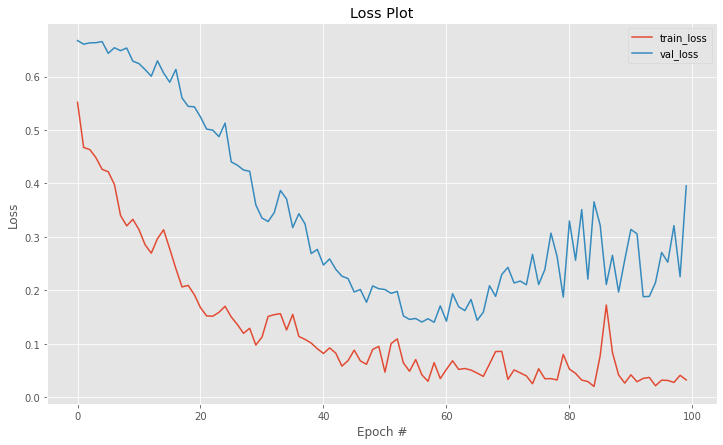

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

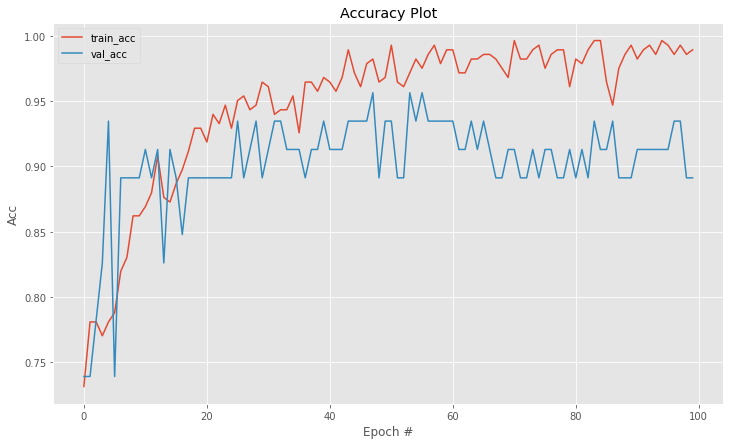

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model1.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 0s 212ms/step - loss: 0.0588 - accuracy: 1.0000
Loss: 0.06
Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model1.predict(test_generator)
labels = (pred > 0.5).astype(np.int)

In [ ]:
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



In [ ]:
model2 = Sequential([
                     Conv2D(32, kernel_size=3, activation='relu', input_shape=(250, 250, 1)),
                     MaxPool2D(2,2),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Dropout(0.5),

                     Flatten(),

                     Dense(64, activation='relu'),
                     Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
start=time.time()
history2 = model2.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          verbose=1)

Epoch 1/100
9/9 [==============================] - 34s 4s/step - loss: 0.8287 - accuracy: 0.6996 - val_loss: 0.6865 - val_accuracy: 0.7391
Epoch 2/100
9/9 [==============================] - 33s 4s/step - loss: 0.5477 - accuracy: 0.7314 - val_loss: 0.6684 - val_accuracy: 0.7391
Epoch 3/100
9/9 [==============================] - 33s 4s/step - loss: 0.5485 - accuracy: 0.7314 - val_loss: 0.6719 - val_accuracy: 0.7391
Epoch 4/100
9/9 [==============================] - 33s 4s/step - loss: 0.5066 - accuracy: 0.7314 - val_loss: 0.6690 - val_accuracy: 0.7391
Epoch 5/100
9/9 [==============================] - 33s 4s/step - loss: 0.4955 - accuracy: 0.7314 - val_loss: 0.6654 - val_accuracy: 0.7391
Epoch 6/100
9/9 [==============================] - 33s 4s/step - loss: 0.4808 - accuracy: 0.7420 - val_loss: 0.6612 - val_accuracy: 0.7391
Epoch 7/100
9/9 [==============================] - 33s 4s/step - loss: 0.4799 - accuracy: 0.7385 - val_loss: 0.6632 - val_accuracy: 0.7391
Epoch 8/100
9/9 [==========

In [ ]:
print("waktu = ", time.time() - start, "detik")

waktu =  3751.1928584575653 detik


In [ ]:
score = model2.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

9/9 [==============================] - 9s 990ms/step - loss: 0.2350 - accuracy: 0.9152
Loss: 0.24
Accuracy: 0.92


In [ ]:
score = model2.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 1s 393ms/step - loss: 0.3394 - accuracy: 0.9130
Loss: 0.34
Accuracy: 0.91


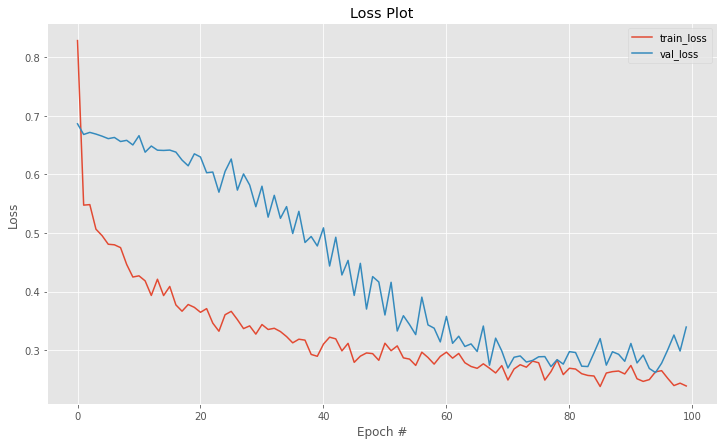

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["loss"], label="train_loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

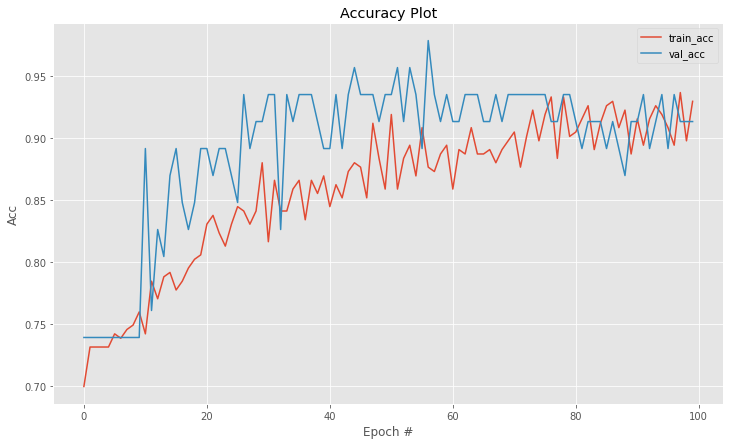

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history2.history["accuracy"], label="train_acc")
plt.plot(history2.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model2.evaluate(test_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 0s 201ms/step - loss: 0.3336 - accuracy: 0.6000
Loss: 0.33
Accuracy: 0.60


In [ ]:
pred2 = model2.predict(test_generator)
labels = (pred2 > 0.5).astype(np.int)

In [ ]:
print(classification_report(test_generator.classes, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model1.save("model1_diabet.h5")
model2.save("model2_diabet.h5")